- Activity regularization provides an approach to encourage a neural network to learn sparse features or internal representations of raw observations
- It is common to seek sparse learned representations in autoencoders, called sparse autoencoders, and in encoder-decoder models, although the approach can also be used generally to reduce overfitting and improve a model’s ability to generalize to new observations
- The regularizer is applied to the output of the layer, but you have control over what the “output” of the layer actually means. Specifically, you have flexibility as to whether the layer output means that the regularization is applied before or after the ‘activation‘ function

#### Overfit MLP

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Train: 1.000, Test: 0.771


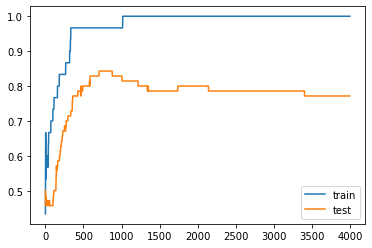

In [1]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

 #### Overfit MLP With Activation Regularization  

Train: 1.000, Test: 0.757


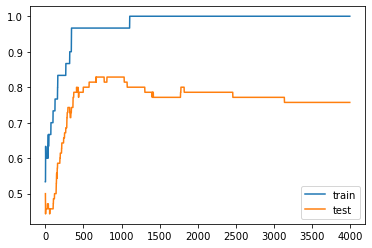

In [3]:
# mlp overfit on the two circles dataset with activation regularization
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from keras.layers import Activation
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='linear', activity_regularizer=l1(0.0001)))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()